In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import platform
from pandas.core.common import SettingWithCopyWarning

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning) 
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
netf = pd.read_csv(r'data\netflix_titles.csv')
continental = pd.read_csv(r'data\country-continents.csv')

# pre-processing

In [3]:
netf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netf.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [5]:
netf_edit = netf.dropna(subset = ['rating', 'date_added', 'duration',])        

In [6]:
netf_edit['country'] = netf_edit['country'].fillna('unknown')

In [7]:
netf_edit['date_added'] = netf_edit['date_added'].astype('datetime64')

In [8]:
netf_edit['date_added_yr'] = netf_edit['date_added'].dt.year
netf_edit['date_added_qt'] = netf_edit['date_added'].dt.quarter
netf_edit['date_added_qt'] = netf_edit['date_added_yr'].astype('str') + '/' + netf_edit['date_added_qt'].astype('str')
netf_edit['date_added_ym'] = netf_edit['date_added'].dt.strftime('%Y-%m')
netf_edit['date_added_season'] = (netf_edit['date_added'].dt.month).apply(lambda x : x//3).apply(lambda x : 4 if x==0 else x)
netf_edit['date_added_season'] = netf_edit['date_added_season'].replace(1,'spring').replace(2,'summer').replace(3,'fall').replace(4,'winter')  

In [9]:
netf_edit

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_yr,date_added_qt,date_added_ym,date_added_season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2021/3,2021-09,fall
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,2021/3,2021-09,fall
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,2021/3,2021-09,fall
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,2021/3,2021-09,fall
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,2021/3,2021-09,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,2019/4,2019-11,fall
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,2019/3,2019-07,summer
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,2019/4,2019-11,fall
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,2020/1,2020-01,winter


In [10]:
netf_edit['genre'] = netf_edit['listed_in'].apply(lambda x: x.split(', ')[0])

In [11]:
netf_edit.loc[365,'country'] = 'France, Algeria'
netf_edit.loc[193,'country'] = 'South Korea'

In [12]:
netf_edit['country_edit'] = netf_edit['country'].apply(lambda x: x.split(',')[0])

In [13]:
ratings_ages = pd.DataFrame({
    'TV-PG': ['Older Kids'],
    'TV-MA': ['Adults'],
    'TV-Y7-FV': ['Older Kids'],
    'TV-Y7': ['Older Kids'],
    'TV-14': ['Teens'],
    'R': ['Adults'],
    'TV-Y': ['Kids'],
    'NR': ['Adults'],
    'PG-13': ['Teens'],
    'TV-G': ['Kids'],
    'PG': ['Older Kids'],
    'G': ['Kids'],
    'UR': ['Adults'],
    'NC-17': ['Adults']
}).T.reset_index()

In [14]:
ratings_ages.columns = ['rating','rating_summary']

In [15]:
netf_edit = pd.merge(netf_edit,ratings_ages, on='rating')

In [16]:
netf_edit = netf_edit[netf_edit['date_added_yr']>2015]

In [17]:
df = netf_edit.reset_index()

In [18]:
df.drop(labels='index',axis=1,inplace=True)

In [19]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_yr,date_added_qt,date_added_ym,date_added_season,genre,country_edit,rating_summary
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,2021/3,2021-09,fall,Documentaries,United States,Teens
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,2021/3,2021-09,fall,Comedies,United States,Teens
2,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,2021/3,2021-09,fall,Comedies,United States,Teens
3,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,2021/3,2021-09,fall,Horror Movies,United States,Teens
4,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",2021,2021/3,2021-09,fall,Thrillers,United States,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,s7318,Movie,Little Singham aur Kaal ka Mahajaal,Prakash Satam,NaN,unknown,2018-12-01,2018,TV-Y7-FV,68 min,"Children & Family Movies, Comedies","When Kaal, the vilest demon on earth, threaten...",2018,2018/4,2018-12,winter,Children & Family Movies,unknown,Older Kids
8648,s7514,Movie,Motu Patlu: King of Kings,Suhas Kadav,"Saurav Chakrabarty, Vinay Pathak",India,2017-07-06,2016,TV-Y7-FV,109 min,"Children & Family Movies, Comedies",Motu and Patlu want to help a circus lion get ...,2017,2017/3,2017-07,summer,Children & Family Movies,India,Older Kids
8649,s7059,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,2019-06-06,1974,UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...,2019,2019/2,2019-06,summer,Dramas,France,Adults
8650,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France",2017-07-10,2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...,2017,2017/3,2017-07,summer,Dramas,United Kingdom,Adults


# processing & visualising

## country

In [20]:
df_c = df[df['country_edit']!='unknown'].groupby(['country_edit','date_added_yr'],as_index=False).agg(country_count = ('show_id','count'))
df_c

,country_edit,date_added_yr,country_count
0,Argentina,2016,3
1,Argentina,2017,10
2,Argentina,2018,23
3,Argentina,2019,16
4,Argentina,2020,13
...,...,...,...
323,Vietnam,2019,1
324,Vietnam,2020,1
325,Vietnam,2021,2
326,West Germany,2017,1


In [21]:
import pycountry
def generate_iso_alpha(dataframe, country_col):
    """
    Appends as 'ISO' column, which contains the alpha3 country code 
    to a pandas dataframe by utilizing the pycountry countries API
    :param dataframe: Pandas Dataframe 
    :param country_col: string Column that contains the country name
    :return: Pandas Dataframe with appended ISO column
    """
    for idx in dataframe.index:
        country = dataframe.loc[idx, country_col]
        try:
            iso = pycountry.countries.get(name=country).alpha_3
            dataframe.loc[idx, 'ISO'] = iso
        except Exception as e:
            try:
                iso = pycountry.countries.get(common_name=country).alpha_3
                dataframe.loc[idx, 'ISO'] = iso
            except Exception as e:
                print(country, e)
                pass
    return dataframe

generate_iso_alpha(df_c, 'country_edit')

df_c.dropna(subset=['ISO'],inplace=True)

Czech Republic 'NoneType' object has no attribute 'alpha_3'
Czech Republic 'NoneType' object has no attribute 'alpha_3'
Czech Republic 'NoneType' object has no attribute 'alpha_3'
Iran 'NoneType' object has no attribute 'alpha_3'
Russia 'NoneType' object has no attribute 'alpha_3'
Russia 'NoneType' object has no attribute 'alpha_3'
Russia 'NoneType' object has no attribute 'alpha_3'
Russia 'NoneType' object has no attribute 'alpha_3'
Russia 'NoneType' object has no attribute 'alpha_3'
Soviet Union 'NoneType' object has no attribute 'alpha_3'
Syria 'NoneType' object has no attribute 'alpha_3'
West Germany 'NoneType' object has no attribute 'alpha_3'


In [22]:
import plotly.express as px

fig = px.scatter_geo(df_c, 
                     locations="ISO",
                     hover_name="country_edit", size="country_count",
                     animation_frame="date_added_yr",
                     projection="equirectangular")
# projection (str) – One of 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', or 'sinusoidal'`Default depends on `scope.
fig.show()

# import plotly.io as po
# po.write_html(fig, file='bubble_map.html', auto_open=True)


In [23]:
import plotly.graph_objects as go
ratio_total   = list(df.groupby(['country_edit'],as_index=False).agg(country_edit_count=('show_id','count')).loc[:,'country_edit_count'])
labels_total  = list(df.groupby(['country_edit'],as_index=False).agg(country_edit_count=('show_id','count')).loc[:,'country_edit'])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
fig = px.bar(df.groupby(['date_added_yr','country_edit',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_yr", y="country_count", color="country_edit", text_auto=True)
fig.show()

In [25]:
fig = px.bar(df.groupby(['date_added_qt','country_edit',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_qt", y="country_count", color="country_edit", text_auto=True)
fig.show()

## genre

In [26]:
import plotly.graph_objects as go
ratio_total   = list(df.groupby(['genre'],as_index=False).agg(genre_count=('show_id','count')).loc[:,'genre_count'])
labels_total  = list(df.groupby(['genre'],as_index=False).agg(genre_count=('show_id','count')).loc[:,'genre'])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
df_genre = pd.DataFrame(df.genre.value_counts()).reset_index().rename(columns={'index':'genre', 'genre':'count'})
fig_tree = px.treemap(df_genre, path=[px.Constant("Geners"), 'count','genre'])
fig_tree.update_layout(margin=dict(t=50, b=0, l=70, r=40),)

In [28]:
fig = px.bar(df.groupby(['date_added_yr','genre',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_yr", y="country_count", color="genre", text_auto=True)
fig.show()

In [29]:
fig = px.bar(df.groupby(['date_added_qt','genre',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_qt", y="country_count", color="genre", text_auto=True)
fig.show()

In [ ]:
#df.groupby(['date_added_season','genre',],as_index=False).agg(country_count = ('show_id','count')).sort_values(by=['spring','summer','fall','winter'])

In [31]:
fig = px.bar(df.groupby(['date_added_season','genre',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_season", y="country_count", color="genre", text_auto=True)
fig.show()

## rating

In [32]:
import plotly.graph_objects as go
ratio_total   = list(df.groupby(['rating_summary'],as_index=False).agg(date_added_yr_count=('show_id','count')).loc[:,'date_added_yr_count'])
labels_total  = list(df.groupby(['rating_summary'],as_index=False).agg(date_added_yr_count=('show_id','count')).loc[:,'rating_summary'])

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total, values=ratio_total)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [33]:
fig = px.bar(df.groupby(['date_added_yr','rating_summary',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_yr", y="country_count", color="rating_summary",category_orders={1:'Adults',2:'Teens',3:'Older kids',4:'Kids'} , text_auto=True)
fig.show()

In [34]:
fig = px.bar(df.groupby(['date_added_qt','rating_summary',],as_index=False).agg(country_count = ('show_id','count')), x="date_added_qt", y="country_count", color="rating_summary",category_orders={1:'Adults',2:'Teens',3:'Older kids',4:'Kids'} , text_auto=True)
fig.show()

In [35]:
df_tv_show = df[df['type']=='TV Show'].groupby('rating_summary',as_index=False).agg(country_count = ('show_id','count'))\
                    .rename(columns={'rating_summary':'tv_show','country_count':'rating_summary'}).sort_values(by='rating_summary')
df_tv_show['rating_summary_final'] = df_tv_show['rating_summary'] 
df_tv_show['rating_summary'] *= -1

df_movie = df[df['type']=='Movie'].groupby('rating_summary',as_index=False).agg(country_count = ('show_id','count'))\
                     .rename(columns={'rating_summary':'movie','country_count':'rating_summary'}).sort_values(by='rating_summary')
                     
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)

fig.append_trace(go.Bar(x=df_tv_show.rating_summary, y=df_tv_show.tv_show, orientation='h', showlegend=True, text=df_tv_show.rating_summary_final, name='TV Show'), 1, 1)
fig.append_trace(go.Bar(x=df_movie.rating_summary, y=df_movie.movie, orientation='h', showlegend=True, text=df_movie.rating_summary, name='Movie'), 1, 2)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None)

In [41]:
df_tv = df[df["type"] == "TV Show"]
col = "date_added_yr"

vc1 = df_tv[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

fig2 = go.Figure(go.Waterfall(
    name = "TV Show", orientation = "v", 
    x = ["2016", "2017", "2018", "2019", "2020", "2021"],
    textposition = "auto",
    text = ["175", "174", "62", "181", "3", "78"],
    y = [175, 174, 62, 181, 3, 78],
))
fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False, visible=False)
fig2.update_traces(hovertemplate=None)

In [39]:
df_mo = df[df["type"] == "Movie"]
col = "date_added_yr"

vc2 = df_mo[col].value_counts().reset_index().rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

fig2 = go.Figure(go.Waterfall(
    name = "Movie", orientation = "v", 
    x = ["2016", "2017", "2018", "2019", "2020", "2021"],
    textposition = "auto",
    text = ["204", "585", "401", "187", "140", "40"],
    y = [204, 585, 401, 187, -140, 40],
))
fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False, visible=False)
fig2.update_traces(hovertemplate=None)


# ML

11:31:39 - cmdstanpy - INFO - Chain [1] start processing
11:31:40 - cmdstanpy - INFO - Chain [1] done processing


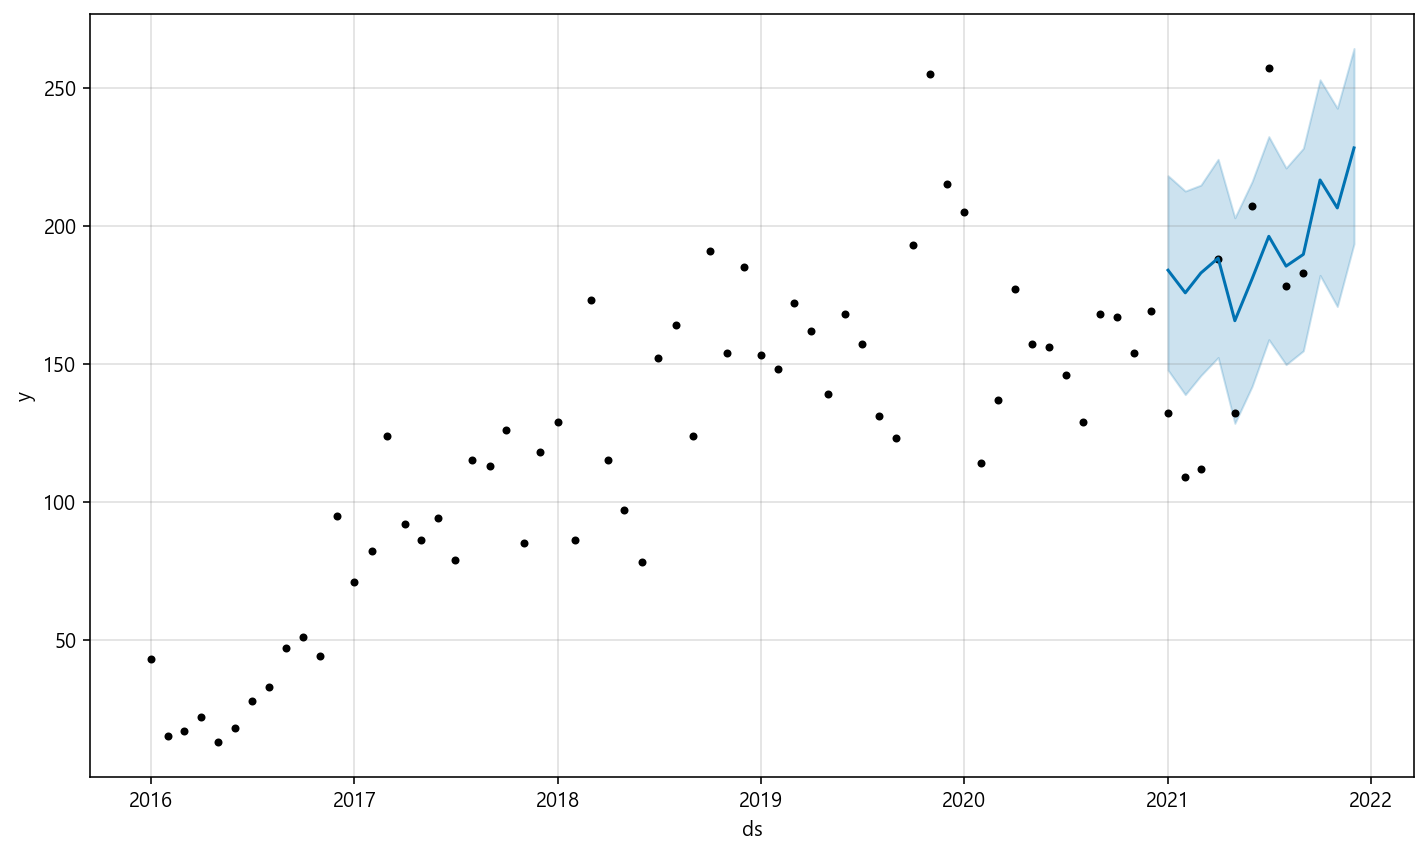

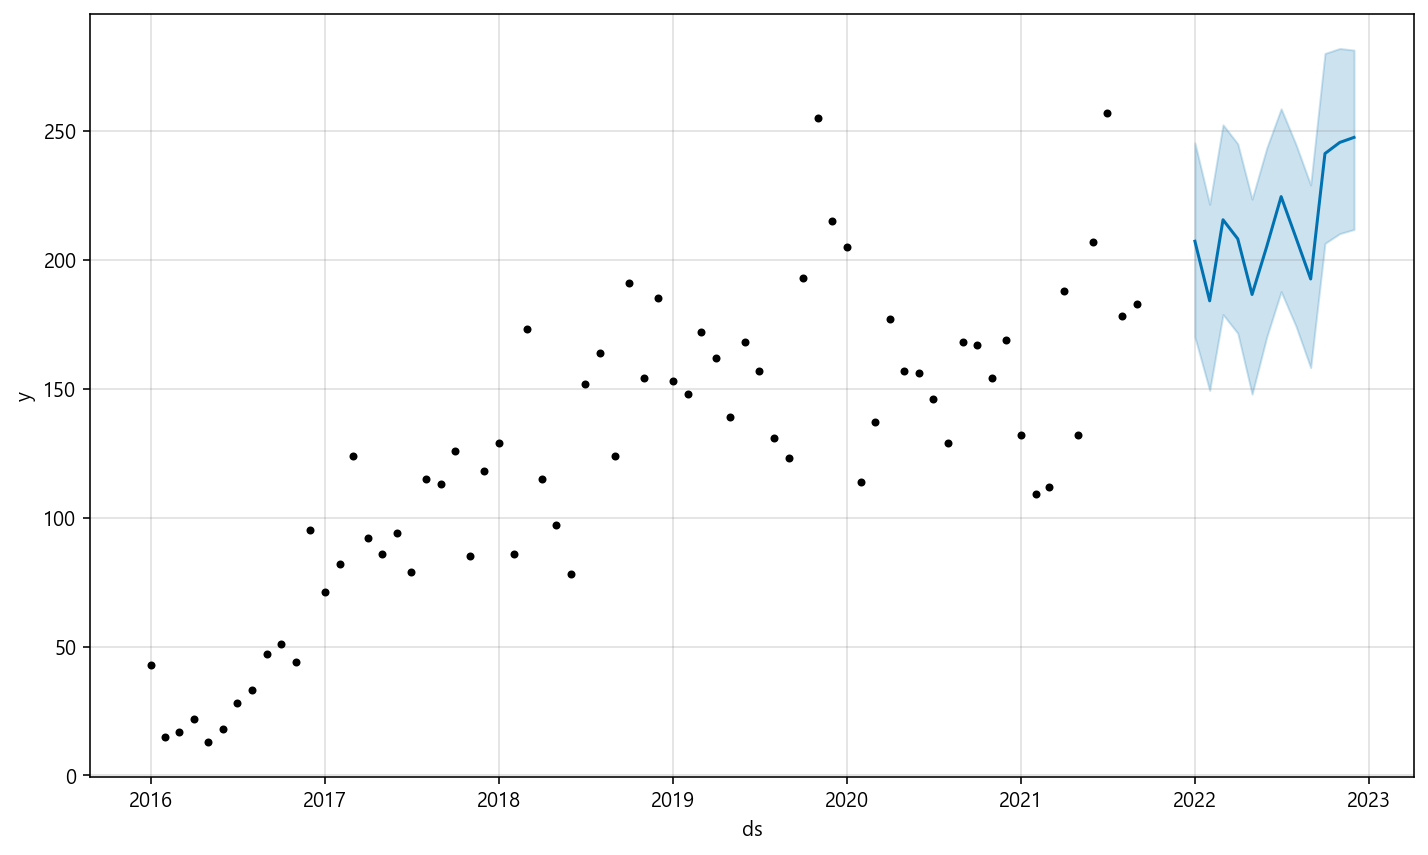

In [44]:
from prophet import Prophet

df_ym = df.groupby('date_added_ym',as_index= False).agg( count = ('show_id', 'count'))
df_ym.columns = ['ds', 'y']

# 모델 생성
model = Prophet()
# 모델 학습
model.fit(df_ym)
# train set 마지막 1년 날짜 생성
last_1year = list()
for i in range(1, 13):
    last_1year.append(['2021-%02d' % i])
last_1year = pd.DataFrame(last_1year, columns = ['ds'])
last_1year['ds']= pd.to_datetime(last_1year['ds'])
# 에측
forecast = model.predict(last_1year)
model.plot(forecast)
plt.show()

# train set 이후 1년 날짜 생성
next_1year = list()
for i in range(1, 13):
    next_1year.append(['2022-%02d' % i])
next_1year = pd.DataFrame(next_1year, columns = ['ds'])
next_1year['ds']= pd.to_datetime(next_1year['ds'])
forecast = model.predict(next_1year)
model.plot(forecast)
plt.show()